In [12]:
import torch
import torch.nn as nn
import torch.optim as optim
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sb

In [3]:
# Load and prepare the data

In [4]:
df = pd.read_csv("datasets/heart_failure.csv")

In [6]:
df.head()

,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,time,DEATH_EVENT
0,75.0,0,582,0,20,1,265000.00,1.9,130,1,0,4,1
1,55.0,0,7861,0,38,0,263358.03,1.1,136,1,0,6,1
2,65.0,0,146,0,20,0,162000.00,1.3,129,1,1,7,1
3,50.0,1,111,0,20,0,210000.00,1.9,137,1,0,7,1
4,65.0,1,160,1,20,0,327000.00,2.7,116,0,0,8,1


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 299 entries, 0 to 298
Data columns (total 13 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   age                       299 non-null    float64
 1   anaemia                   299 non-null    int64  
 2   creatinine_phosphokinase  299 non-null    int64  
 3   diabetes                  299 non-null    int64  
 4   ejection_fraction         299 non-null    int64  
 5   high_blood_pressure       299 non-null    int64  
 6   platelets                 299 non-null    float64
 7   serum_creatinine          299 non-null    float64
 8   serum_sodium              299 non-null    int64  
 9   sex                       299 non-null    int64  
 10  smoking                   299 non-null    int64  
 11  time                      299 non-null    int64  
 12  DEATH_EVENT               299 non-null    int64  
dtypes: float64(3), int64(10)
memory usage: 30.5 KB


In [8]:
df.describe()

,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,time,DEATH_EVENT
count,299.000000,299.000000,299.000000,299.000000,299.000000,299.000000,299.000000,299.00000,299.000000,299.000000,299.00000,299.000000,299.00000
mean,60.833893,0.431438,581.839465,0.418060,38.083612,0.351171,263358.029264,1.39388,136.625418,0.648829,0.32107,130.260870,0.32107
std,11.894809,0.496107,970.287881,0.494067,11.834841,0.478136,97804.236869,1.03451,4.412477,0.478136,0.46767,77.614208,0.46767
min,40.000000,0.000000,23.000000,0.000000,14.000000,0.000000,25100.000000,0.50000,113.000000,0.000000,0.00000,4.000000,0.00000
25%,51.000000,0.000000,116.500000,0.000000,30.000000,0.000000,212500.000000,0.90000,134.000000,0.000000,0.00000,73.000000,0.00000
50%,60.000000,0.000000,250.000000,0.000000,38.000000,0.000000,262000.000000,1.10000,137.000000,1.000000,0.00000,115.000000,0.00000
75%,70.000000,1.000000,582.000000,1.000000,45.000000,1.000000,303500.000000,1.40000,140.000000,1.000000,1.00000,203.000000,1.00000
max,95.000000,1.000000,7861.000000,1.000000,80.000000,1.000000,850000.000000,9.40000,148.000000,1.000000,1.00000,285.000000,1.00000


array([[<Axes: title={'center': 'age'}>,
        <Axes: title={'center': 'anaemia'}>,
        <Axes: title={'center': 'creatinine_phosphokinase'}>,
        <Axes: title={'center': 'diabetes'}>],
       [<Axes: title={'center': 'ejection_fraction'}>,
        <Axes: title={'center': 'high_blood_pressure'}>,
        <Axes: title={'center': 'platelets'}>,
        <Axes: title={'center': 'serum_creatinine'}>],
       [<Axes: title={'center': 'serum_sodium'}>,
        <Axes: title={'center': 'sex'}>,
        <Axes: title={'center': 'smoking'}>,
        <Axes: title={'center': 'time'}>],
       [<Axes: title={'center': 'DEATH_EVENT'}>, <Axes: >, <Axes: >,
        <Axes: >]], dtype=object)

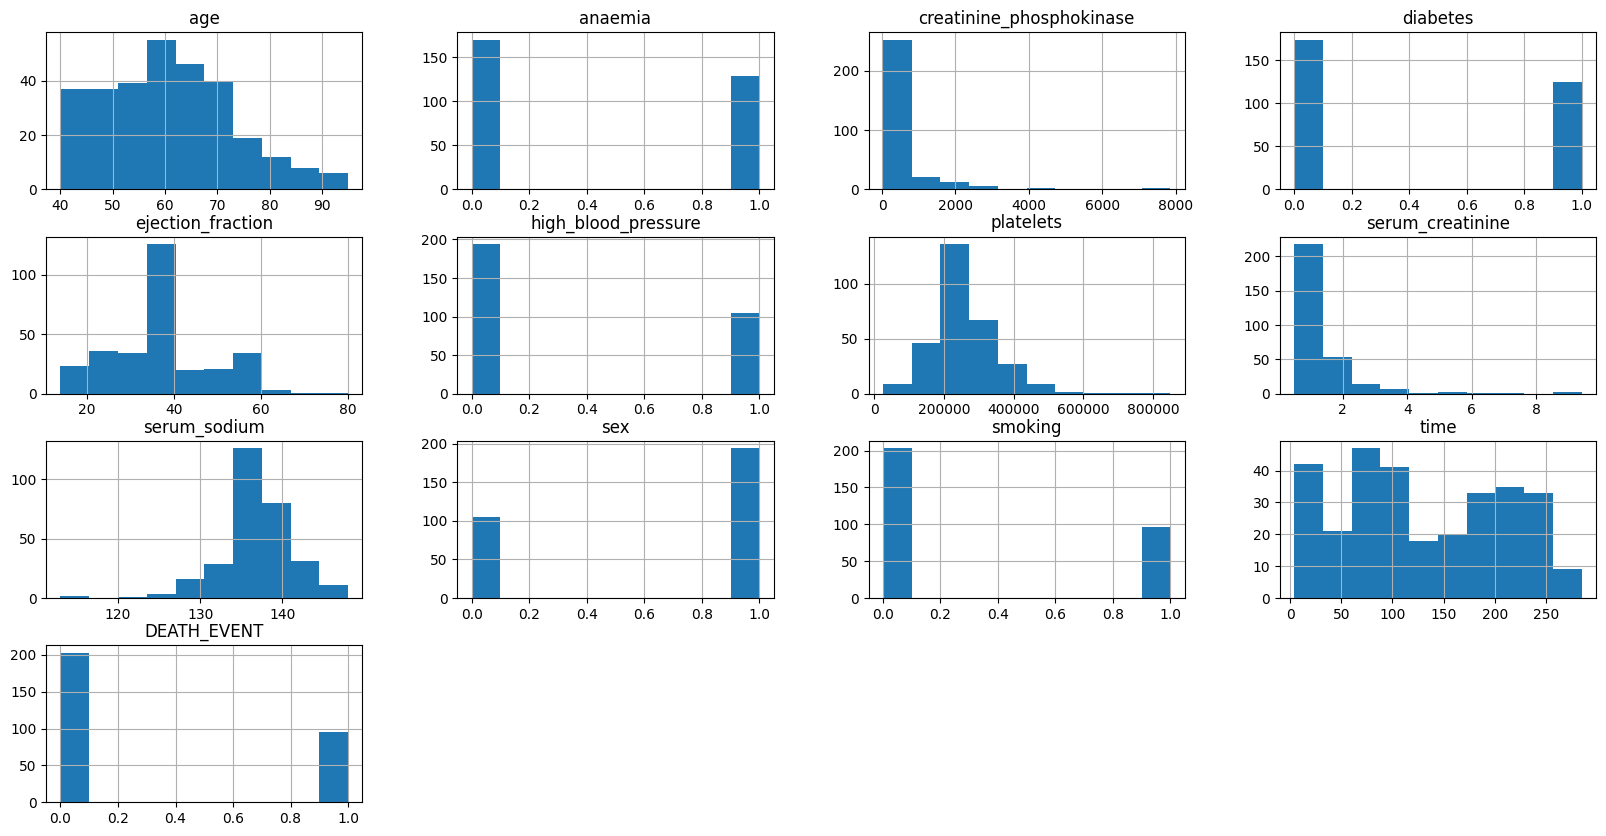

In [11]:
df.hist(figsize=(20, 10), bins=10)

In [13]:
df.corr()

,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,time,DEATH_EVENT
age,1.000000,0.088006,-0.081584,-0.101012,0.060098,0.093289,-0.052354,0.159187,-0.045966,0.065430,0.018668,-0.224068,0.253729
anaemia,0.088006,1.000000,-0.190741,-0.012729,0.031557,0.038182,-0.043786,0.052174,0.041882,-0.094769,-0.107290,-0.141414,0.066270
creatinine_phosphokinase,-0.081584,-0.190741,1.000000,-0.009639,-0.044080,-0.070590,0.024463,-0.016408,0.059550,0.079791,0.002421,-0.009346,0.062728
diabetes,-0.101012,-0.012729,-0.009639,1.000000,-0.004850,-0.012732,0.092193,-0.046975,-0.089551,-0.157730,-0.147173,0.033726,-0.001943
ejection_fraction,0.060098,0.031557,-0.044080,-0.004850,1.000000,0.024445,0.072177,-0.011302,0.175902,-0.148386,-0.067315,0.041729,-0.268603
high_blood_pressure,0.093289,0.038182,-0.070590,-0.012732,0.024445,1.000000,0.049963,-0.004935,0.037109,-0.104615,-0.055711,-0.196439,0.079351
platelets,-0.052354,-0.043786,0.024463,0.092193,0.072177,0.049963,1.000000,-0.041198,0.062125,-0.125120,0.028234,0.010514,-0.049139
serum_creatinine,0.159187,0.052174,-0.016408,-0.046975,-0.011302,-0.004935,-0.041198,1.000000,-0.189095,0.006970,-0.027414,-0.149315,0.294278
serum_sodium,-0.045966,0.041882,0.059550,-0.089551,0.175902,0.037109,0.062125,-0.189095,1.000000,-0.027566,0.004813,0.087640,-0.195204
sex,0.065430,-0.094769,0.079791,-0.157730,-0.148386,-0.104615,-0.125120,0.006970,-0.027566,1.000000,0.445892,-0.015608,-0.004316


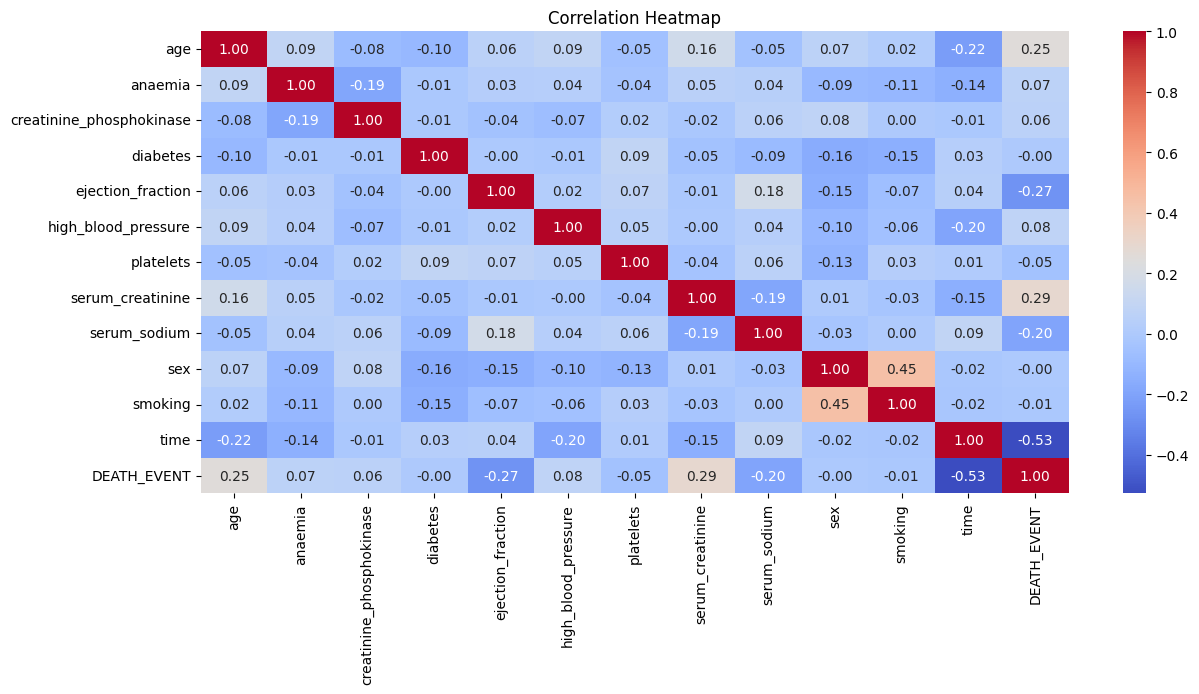

In [14]:
plt.figure(figsize=(14, 6))
sb.heatmap(df.corr(), annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Heatmap')
plt.show()

In [27]:
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

In [28]:
scaler = StandardScaler()

In [23]:
X, y = df.drop("DEATH_EVENT", axis=1), df["DEATH_EVENT"]

In [29]:
X_scaled = scaler.fit_transform(X)

In [31]:
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, random_state=42, test_size=0.1)

In [32]:
print("X_train shape", X_train.shape)
print("X_test shape", X_test.shape)
print("y_train shape", y_train.shape)
print("y_test shape", y_test.shape)

X_train shape (269, 12)
X_test shape (30, 12)
y_train shape (269,)
y_test shape (30,)


In [36]:
y_train.dtype

dtype('int64')

In [42]:
y_test_numpy = y_test.to_numpy()
y_train_numpy = y_train.to_numpy()

In [43]:
X_train_tensor = torch.tensor(X_train, dtype=torch.float32)
X_test_tensor = torch.tensor(X_test, dtype=torch.float32)
y_train_tensor = torch.tensor(y_train_numpy, dtype=torch.float32)
y_test_tensor = torch.tensor(y_test_numpy, dtype=torch.float32)

In [59]:
X_train_tensor

tensor([[-1.3334e+00, -8.7110e-01,  1.6573e-04,  ...,  7.3569e-01,
         -6.8768e-01, -1.5004e+00],
        [-4.9128e-01,  1.1480e+00, -4.1484e-01,  ...,  7.3569e-01,
          1.4542e+00,  1.0420e+00],
        [-9.1234e-01,  1.1480e+00, -4.3652e-01,  ..., -1.3593e+00,
         -6.8768e-01, -1.3069e+00],
        ...,
        [-4.9128e-01, -8.7110e-01,  1.7154e-01,  ...,  7.3569e-01,
         -6.8768e-01, -5.4541e-01],
        [-1.4176e+00, -8.7110e-01,  1.6573e-04,  ...,  7.3569e-01,
          1.4542e+00,  1.4679e+00],
        [ 1.6140e+00, -8.7110e-01,  3.2639e-01,  ...,  7.3569e-01,
          1.4542e+00, -5.5832e-01]])

In [ ]:
# Build Linear model

In [128]:
class BinaryClassificationModel(nn.Module):
    def __init__(self):
        super().__init__()

        self.f1 = nn.Linear(12, 32)
        self.relu1 = nn.ReLU()
        self.f2 = nn.Linear(32, 64)
        self.relu2 = nn.ReLU()
        self.f3 = nn.Linear(64, 1)
        self.sigmoid = nn.Sigmoid()

    def forward(self, x):
        x = self.relu1(self.f1(x))
        x = self.relu2(self.f2(x))
        x = self.sigmoid(self.f3(x))
        return x


In [129]:
model = BinaryClassificationModel()
optimizer = optim.SGD(params=model.parameters(), lr=0.01)
loss_fn = nn.BCELoss() 

In [130]:
epochs = 1100
for epoch in range(epochs):
    model.train()
    y_pred = model(X_train_tensor)
    y_pred = torch.squeeze(y_pred, dim=1)
    train_loss = loss_fn(y_pred, y_train_tensor)
    optimizer.zero_grad()
    train_loss.backward()
    optimizer.step()

    model.eval()
    with torch.inference_mode():
        test_pred = model(X_test_tensor)
        test_pred = torch.squeeze(test_pred, dim=1)
        test_loss = loss_fn(test_pred, y_test_tensor)

    if epoch % 100 == 0:
        print(f"Epoch = {epoch}, train loss = {train_loss}, test loss = {test_loss}")
    

Epoch = 0, train loss = 0.6860321164131165, test loss = 0.6790891885757446
Epoch = 100, train loss = 0.6254981160163879, test loss = 0.653974711894989
Epoch = 200, train loss = 0.5979297757148743, test loss = 0.6464143395423889
Epoch = 300, train loss = 0.5765550136566162, test loss = 0.6367769837379456
Epoch = 400, train loss = 0.5542886257171631, test loss = 0.6219081878662109
Epoch = 500, train loss = 0.5290015339851379, test loss = 0.6020374298095703
Epoch = 600, train loss = 0.5006111860275269, test loss = 0.5791788697242737
Epoch = 700, train loss = 0.4702247679233551, test loss = 0.5569740533828735
Epoch = 800, train loss = 0.44091278314590454, test loss = 0.5383539199829102
Epoch = 900, train loss = 0.4148389995098114, test loss = 0.5256319046020508
Epoch = 1000, train loss = 0.3931725323200226, test loss = 0.5195352435112


In [133]:
torch.save(model.state_dict(), "heart_failure.pth")